# Thématique 1 : l'eau (TP2 - analyse et interprétation des données)

L'analyse des données se fera en utilisant le langage de programmation Python.

## Les données des balances

Lors de l'expérience qui s'est déroulée en S2 et S3, 6 pots étaient posés sur des balances reliées à des "data loggers" (ou "collecteur de données") enregistrant le poids mesuré par la balance toutes les 10 minutes. Trois pots ne contenaient que du terreau. Ces pots "témoins" permettent d'observer ce qu'il se passe en l'absence de plante. Les 3 autres pots contenaient du terreau dans lequel était enraciné un plant de maïs.

Les données collectées se trouve dans un fichier [CSV](https://fr.wikipedia.org/wiki/Comma-separated_values) ("Comma-separated values") nommé ```balances-2025.csv``` et contenant 7 colonnes :
- ```time``` (l'instant à laquelle la mesure a été effectuée),
- ```tem_1```, ```tem_2```, et ```tem_3``` contenant les données des pots témoins, et
- ```plant_1```, ```plant_2``` et ```plant_3``` contenant les données des pots contenant un plant de maïs.

Pour manipuler les données, nous allons utiliser la bibliothèque Python [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html). Pandas s'importe de la façon suivante, en utilisant par convention l'alias ```pd``` :

In [51]:
import pandas as pd

Une fois Pandas importé, on lit le fichier CSV en utilisant la fonction ```read_csv()``` en indiquant si nécessaire le caractère utilisé comme séparateur de colonnes dans le fichier CSV (typiquement la "," ou le ";") :

In [52]:
# le paramètre optionnel 'sep' permet d'indiquer le caractère utilisé comme séparateur de colonnes
df = pd.read_csv('data/balances-2025.csv', sep=';')

La fonction ```read_csv()``` transforme le fichier CSV en un objet que l'on appelle un *DataFrame* (communément abrégé ```df```). Concrètement, il ne s'agit de rien de plus qu'un tableau à deux dimensions contenant des lignes et des colonnes, analogue à un tableur Excel.

La fonction ```head()``` permet d'afficher les 5 premières lignes d'un DataFrame.

In [53]:
df.head()

,time,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
0,45687.58142,0.00,0.00,0.00,0.00,0.00,0.00
1,45687.58837,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2,45687.59530,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
3,45687.60225,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
4,45687.60919,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


Les 7 colonnes annoncées sont bien là ! La colonne ```time``` n'est cependant pas très lisible. Et pour cause, l'unité utilisée par les balances pour indiquer l'instant de la mesure est le nombre de jours écoulés depuis le 30 décembre 1899.

La fonction ```to_datetime()``` de Pandas permet de convertir ce genre de données en un objet Python spécifiquement destiné à stocker et manipuler des dates et des heures (datetime). On applique cette fonction à la colonne ```time``` et on remplace cette colonne par le résultat de l'opération :

In [54]:
# les paramètres 'unit' et 'origin' permettent d'indiquer l'unité et l'origine des données temporelles à convertir en objets datetime
df['time'] = pd.to_datetime(df['time'], unit="d", origin="1899-12-30")

On utilise à nouveau la fonction ```head()``` pour afficher les 5 premières lignes du DataFrame et vérifier le résultat de l'opération :

In [55]:
df.head()

,time,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
0,2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00
1,2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2,2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
3,2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
4,2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


En passant, on a vu que l'on accède à une colonne spécifique d'un DataFrame de la façon suivante `df['<nom de la colonne>']`. Ainsi, `df['plant_1']` contient les données concernant la plante n°1 :

In [56]:
df['plant_1'].head()

0    0.00
1   -2.24
2   -2.26
3   -1.95
4   -1.80
Name: plant_1, dtype: float64

De manière équivalente, il est possible d'accéder à la colonne ```plant_1``` via ```df.plant_1```, ce qui est parfois plus commode à écrire que `df['plant_1']` :

In [57]:
df.plant_1.head()

0    0.00
1   -2.24
2   -2.26
3   -1.95
4   -1.80
Name: plant_1, dtype: float64

Pour se simplifier la vie, on indique ensuite à Pandas que l'on souhaite utiliser la colonne ```time``` comme indices ("index") du DataFrame :

In [58]:
df = df.set_index('time')
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
time,,,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00
2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03
2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05
2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06
2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09


De cette manière, il est possible de facilement sélectionner les données pour une période donnée, par exemple pour récupérer les données du 01-02-2025 au 02-02-2025 comme ci-dessous (notez qu'il faut indiquer la date en respectant le format ```YYYY-MM-JJ```) :

In [59]:
df['plant_1']["2025-02-01":"2025-02-02"]

time
2025-02-01 00:07:03.359999991   -17.74
2025-02-01 00:17:02.975999930   -17.50
2025-02-01 00:27:02.591999870   -18.08
2025-02-01 00:37:03.072000103   -18.47
2025-02-01 00:47:02.688000043   -18.48
                                 ...  
2025-02-02 23:16:47.135999809   -50.33
2025-02-02 23:26:46.751999749   -50.53
2025-02-02 23:36:47.231999982   -51.91
2025-02-02 23:46:46.847999922   -51.16
2025-02-02 23:56:47.328000155   -50.75
Name: plant_1, Length: 288, dtype: float64

### Question 1

Ajoutez une nouvelle colonne ```evap``` au DataFrame. Cette colonne doit contenir l'**évaporation** cumulée moyenne (en g d'eau) des 3 pots témoins.

#### Correction

Méthode n°1 (la plus simple) : on somme les 3 colonnes ```tem_i```, on divise le résultat par 3, et on prend l'opposé :

In [60]:
df['evap'] = -(df['tem_1'] + df['tem_2'] + df['tem_3'])/3
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3,evap
time,,,,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03,0.030000
2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05,0.066667
2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06,0.090000
2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09,0.123333


Méthode n°2 : on sélectionne les 3 colonnes ```tem_i``` et on obtient la moyenne via la fonction ```mean()``` en spécifiant ```axis=1``` pour que la moyenne soit calculée le long des lignes et non le long des colonnes :

In [61]:
df['evap'] = -df[['tem_1', 'tem_2', 'tem_3']].mean(axis=1)
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3,evap
time,,,,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03,0.030000
2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05,0.066667
2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06,0.090000
2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09,0.123333


Nous n'avons plus besoin des colonnes ```tem_i```. Pour simplifier l'affichage du DataFrame pour la suite, on peut supprimer ces colonnes avec la fonction ```drop()``` et en précisant les colonnes à supprimer :

In [62]:
df = df.drop(columns=['tem_1', 'tem_2', 'tem_3'])
df.head()

,plant_1,plant_2,plant_3,evap
time,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-1.51,0.39,0.030000
2025-01-30 14:17:13.920000077,-2.26,-2.47,0.48,0.066667
2025-01-30 14:27:14.400000311,-1.95,-1.81,0.54,0.090000
2025-01-30 14:37:14.016000250,-1.80,-2.79,-1.99,0.123333


### Question 2

Ajoutez 3 nouvelles colonnes `trans_1`, `trans_2` et `trans_3` au DataFrame. La colonne `trans_i` doit contenir la **transpiration** cumulée (en g d'eau) du plant de maïs $i$.

#### Correction

On prend l'opposée de la colonne ```plant_i``` et on soustrait l'évaporation moyenne pour passer de l'évapotranspiration à la transpiration :

In [63]:
df['trans_1'] = -df['plant_1'] - df['evap']
df['trans_2'] = -df['plant_2'] - df['evap']
df['trans_3'] = -df['plant_3'] - df['evap']

Comme précédemment, on peut se débarrasser des colonnes ```plant_i``` :

In [64]:
df = df.drop(columns=['plant_1', 'plant_2', 'plant_3'])
df.head()

,evap,trans_1,trans_2,trans_3
time,,,,
2025-01-30 13:57:14.688000198,-0.000000,0.000000,0.000000,0.000000
2025-01-30 14:07:15.167999801,0.030000,2.210000,1.480000,-0.420000
2025-01-30 14:17:13.920000077,0.066667,2.193333,2.403333,-0.546667
2025-01-30 14:27:14.400000311,0.090000,1.860000,1.720000,-0.630000
2025-01-30 14:37:14.016000250,0.123333,1.676667,2.666667,1.866667


### Question 3

Représentez graphiquement la transpiration cumulée des 3 plants de maïs ainsi que l'évaporation cumulée moyenne au cours du temps.

_Hint_ : `df.plot()`.

#### Correction

Il existe plein de façon de représenter graphiquement des données en Python, par exemple via les bibliothèques Matplotlib et Seaborn. Ici, comme l'objectif est plus d'explorer les données que de produire de magnifiques graphiques prêts à être publiés, on va se contenter de la fonction `plot()` de Pandas (qui utilise en réalité Matplotlib derrière). Celle-ci s'applique directement à un DataFrame, à une colonne spécifique d'un DataFrame ou à une portion quelconque de DataFrame.

<Axes: xlabel='time', ylabel="[g d'eau]">

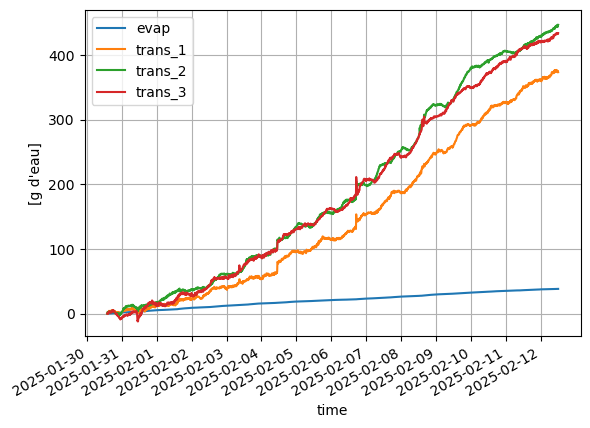

In [65]:
# On importe la bibliothèque Numpy de Python sous l'alias conventionnel "np". Cette bibliothèque est très utile, mais ici on ne l'utilise que de manière anecdotique pour légèrement améliorer l'affichage de notre graphique (voir la fonction np.unique() ci-dessous).
import numpy as np

# Le paramètre optionnel xticks permet de dire à Pandas que l'on veut que toutes les dates soient affichées sur l'axe des x. Essayez sans, vous verrez que c'est moins lisible.
df.plot(grid=True, xticks=np.unique(df.index.date), ylabel="[g d'eau]")

*Remarque* : sur le graphique ci-dessus, l'espace séparent deux lignes verticales correspond à une journée (24 heures), de 00:00 à 00:00.

### Question 4

Pour faciliter l'interprétation, représentez graphiquement la transpiration cumulée de la plante 1 sur une période plus courte, entre 07-02-2025 et 11-02-2025.

#### Correction

On utilise à nouveau la fonction `plot()`, mais cette fois sur une sélection précise du DataFrame :

<Axes: xlabel='time', ylabel="[g d'eau]">

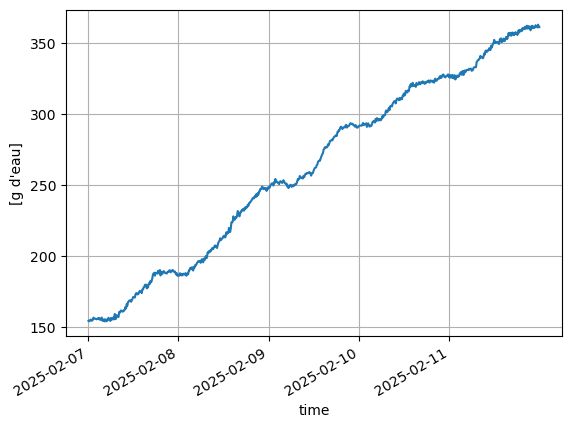

In [66]:
df_cropped = df['trans_1']["2025-02-07":"2025-02-11"]

df_cropped.plot(grid=True, xticks=np.unique(df_cropped.index.date), ylabel="[g d'eau]")

### Question 5

Assez de manipulation de données, passons à leur interpretation : comment évoluent la transpiration et l'évaporation au cours d'une journée ? Et sur plusieurs jours ?

## Les données des potentiomètres

Pour mesurer la croissance d'une feuille d'un plant de maïs, son extrémité est attachée à une ficelle. Cette ficelle passe par une poulie accrochée au-dessus du plant et est attachée à son autre extrémité à une petite masse qui permet de maintenir la ficelle tendue. Lorsque la jeune feuille s'allonge, la petite masse descend et fait tourner la poulie. La croissance de la feuille peut alors être mesurée en "tours de poulie" via un petit dispositif électronique qui suit mécaniquement le mouvement de la poulie.

On commence par importer les données du fichier CSV de manière similaire à précédemment pour les données des balances :

In [67]:
df = pd.read_csv('data/potentiometres-2025.csv', sep=';')

# Conversion de la colonne 'time' en objet datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S UTC')

# Conversion d'UTC vers notre fuseau horaire (+1h)
df['time'] += pd.Timedelta('01:00:00')

# On utilise la colonne 'time' comme indice du DataFrame
df = df.set_index('time')

# Affichage des 5 premières lignes
df.head()

,pot_1,pot_2,pot_3,pot_4,pot_5,pot_6
time,,,,,,
2025-01-28 11:00:00,0,0,0,0,0,0
2025-01-28 11:03:00,0,0,0,0,0,0
2025-01-28 11:06:00,0,0,0,0,0,0
2025-01-28 11:09:00,0,0,0,0,0,0
2025-01-28 11:12:00,0,0,0,0,0,0


Que des "0" dans les 5 premières lignes du DataFrame. Pour s'assurer qu'il contient bien quelque chose, on peut utilise la fonction `tail()` qui affiche les 5 dernières lignes du DataFrame :

In [68]:
df.tail()

,pot_1,pot_2,pot_3,pot_4,pot_5,pot_6
time,,,,,,
2025-02-17 10:32:39,1212,1572,-1074,807,0,-497
2025-02-17 10:35:39,1212,1572,-1074,807,0,-497
2025-02-17 10:38:39,1212,1572,-1074,807,0,-497
2025-02-17 10:41:39,1212,1572,-1074,807,0,-497
2025-02-17 10:44:39,1212,1572,-1074,807,0,-497


C'est bon, le DataFrame contient bien quelque chose. Par contre, la colonne `pot_5` ne contient que des 0. On la supprime :

In [69]:
df = df.drop(columns=['pot_5'])

Maintenant, c'est à vous de jouer !

### Question 1

Les données enregistrées par les potentiomètres ne correspondent pas *directement* à des longueurs de feuilles. Chaque variation de $\pm 1$ enregistrée par un potentiomètre correspond à un 1/80e de tour de poulie. Sachant que le diamètre de la poulie est de 2,6 cm, convertissez les données des potentiomètres en centimètres d'élongation des feuilles. Affichez le résultat sur un graphique, en fonction du temps.

*Hint* :
- le signe des valeurs mesurées par les potentiomètres traduit le sens de rotation de la poulie. Pensez-vous que cette information soit pertinente ici ?
- `from math import pi` vous permettra d'utiliser la variable `pi` dans votre code.

#### Correction

D'abord, le sens de rotation de la poulie n'a pas d'intérêt ici. On utilise la fonction `abs()` (valeur absolue) sur l'ensemble des données pour s'assurer de ne plus traiter que des valeurs positives par la suite :

In [70]:
df = abs(df)

# Affichage des 5 dernières lignes pour voir ce qu'on fait
df.tail()

,pot_1,pot_2,pot_3,pot_4,pot_6
time,,,,,
2025-02-17 10:32:39,1212,1572,1074,807,497
2025-02-17 10:35:39,1212,1572,1074,807,497
2025-02-17 10:38:39,1212,1572,1074,807,497
2025-02-17 10:41:39,1212,1572,1074,807,497
2025-02-17 10:44:39,1212,1572,1074,807,497


Ensuite, on convertit les "unités potentiomètres" (1/80e de tour de poulie d'un diamètre de 2,6 cm) en centimètres :

In [71]:
from math import pi

df = df * 1/80 * pi * 2.6

# Affichage des 5 dernières lignes pour voir ce qu'on fait
df.tail()

,pot_1,pot_2,pot_3,pot_4,pot_6
time,,,,,
2025-02-17 10:32:39,123.747335,160.503969,109.657292,82.396121,50.744575
2025-02-17 10:35:39,123.747335,160.503969,109.657292,82.396121,50.744575
2025-02-17 10:38:39,123.747335,160.503969,109.657292,82.396121,50.744575
2025-02-17 10:41:39,123.747335,160.503969,109.657292,82.396121,50.744575
2025-02-17 10:44:39,123.747335,160.503969,109.657292,82.396121,50.744575


Enfin, on affiche les données sur un graphique, en fonction du temps :

<Axes: xlabel='time', ylabel='[cm]'>

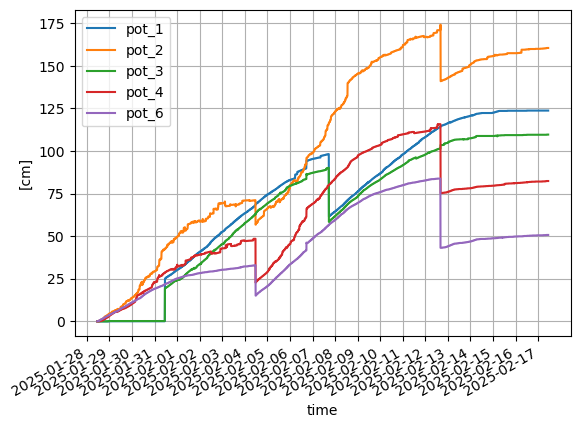

In [72]:
df.plot(grid=True,
        xticks=np.unique(df.index.date),
        ylabel="[cm]")

_Remarque_ : Pandas affiche automatiquement les données en fonction du temps parce que nous avons définit la colonne `time` comme indices du DataFrame via la fonction `set_index()` plus haut. Sans cela, il aurait fallu préciser à Pandas qu'afficher sur l'axe des x.

### Question 2

Les discontinuités visibles sur le graphe précédent sont dues aux manipulations de vos chers assistants lorsque la ficelle est transférée d'une feuille à l'autre et que la masse est remontée de quelques dizaines de centimètres.

Sur des graphiques différents, affichez la courbe de croissance mesurée par le potentiomètre n°4 et n°6 entre le 28-01-2025 et le 03-02-2025 (1e graphique) et entre le 05-02-2025 et le 11-02-2025 (2e graphique). Qu'observez-vous ?

#### Correction

On utilise encore la fonction `plot()`, mais cette fois en indiquant la colonne et l'intervalle de temps à afficher. Rappelez-vous que le format de date à utiliser est `YYYY:MM:DD`.

<Axes: xlabel='time'>

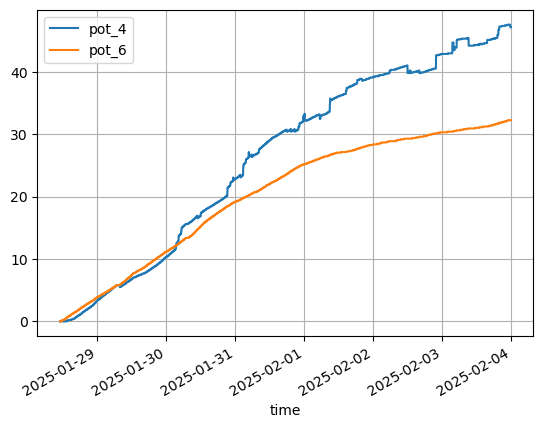

In [73]:
df[['pot_4', 'pot_6']]['2025-01-28':'2025-02-03'].plot(grid=True)

<Axes: xlabel='time'>

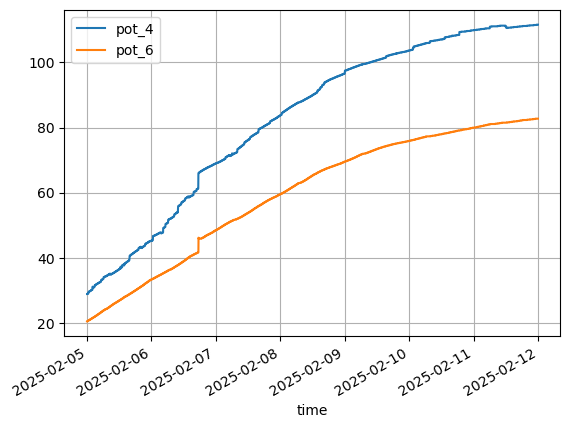

In [74]:
df[['pot_4', 'pot_6']]['2025-02-05':'2025-02-11'].plot(grid=True)

### Question 3

Affichez maintenant la croissance mesurée par le potentiomètre n°6 entre du 12 février 15h30 au 14 février 15h30. Qu'observez-vous ? Par quel(s) mécanisme(s) pouvez-vous expliquer cette dynamique journalière ?


#### Correction

<Axes: xlabel='time'>

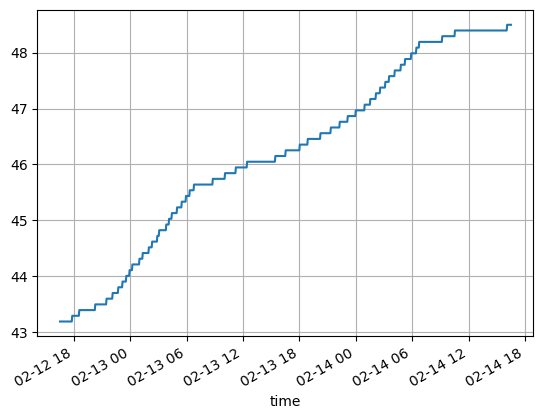

In [75]:
df['pot_6']['2025-02-12 16:30':'2025-02-14 16:30'].plot(grid=True)

## Bonus : les données du poromètre